In [1]:
library(dplyr)
library(plyr)
library(stringr)
library(lubridate)
library(ggplot2)
library(zoo)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date,

In [2]:
df_weather <- read.csv("../Data/openweather_data.csv")

In [3]:
head(df_weather, n=1)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,⋯,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<int>,<chr>,<chr>,<chr>
1,1540339200,2018-10-24 00:00:00 +0000 UTC,3600,Belfast,54.59728,-5.93012,283.89,9999,281.12,283.19,⋯,10.8,NA,NA,NA,NA,1,800,Clear,sky is clear,01n


In [4]:
names(df_weather)

[1] "dt"                  "dt_iso"              "timezone"           
 [4] "city_name"           "lat"                 "lon"                
 [7] "temp"                "visibility"          "dew_point"          
[10] "feels_like"          "temp_min"            "temp_max"           
[13] "pressure"            "sea_level"           "grnd_level"         
[16] "humidity"            "wind_speed"          "wind_deg"           
[19] "wind_gust"           "rain_1h"             "rain_3h"            
[22] "snow_1h"             "snow_3h"             "clouds_all"         
[25] "weather_id"          "weather_main"        "weather_description"
[28] "weather_icon"

In [5]:
df_weather$chunk <- as.POSIXct(df_weather$dt, tz = "GMT", origin="1970-01-01")
df_weather <- df_weather %>% transmute(chunk, city_name, temp = temp - 273.15, cloud_cover = clouds_all, rainfall = rain_1h)
df_weather$rainfall <- ifelse(is.na(df_weather$rainfall),0,df_weather$rainfall)

In [6]:
head(df_weather, n=2)

,chunk,city_name,temp,cloud_cover,rainfall
,<dttm>,<chr>,<dbl>,<int>,<dbl>
1,2018-10-24 00:00:00,Belfast,10.74,1,0
2,2018-10-24 01:00:00,Belfast,10.73,75,0


In [7]:
df_NI <- df_weather[df_weather$city_name == 'Belfast', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_Wales <- df_weather[df_weather$city_name == 'Cardiff', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_NE <- df_weather[df_weather$city_name == 'Newcastle upon Tyne', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_EM <- df_weather[df_weather$city_name == 'Derby', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_Scot <- df_weather[df_weather$city_name == 'Glasgow', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_East <- df_weather[df_weather$city_name == 'Norwich', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_YatH <- df_weather[df_weather$city_name == 'Sheffield', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_WM <- df_weather[df_weather$city_name == 'Birmingham', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_SW <- df_weather[df_weather$city_name == 'Bristol', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_GL <- df_weather[df_weather$city_name == 'London', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_NW <- df_weather[df_weather$city_name == 'Liverpool', ] %>% select(chunk, temp, cloud_cover, rainfall)
df_SE <- df_weather[df_weather$city_name == 'Southampton', ] %>% select(chunk, temp, cloud_cover, rainfall)

In [8]:
weights <- readRDS('../Data/location_demo_weights.rds')
weights


        Northern Ireland                    Wales               North East 
              0.01994474               0.04315499               0.04760111 
           East Midlands                 Scotland          East of England 
              0.08411831               0.08463326               0.08769781 
Yorkshire and the Humber            West Midlands               South West 
              0.09041698               0.09153479               0.09601231 
          Greater London               North West               South East 
              0.10631751               0.11737629               0.13119191 

In [9]:
df_NI[,c('temp_NI', 'cloud_cover_NI','rainfall_NI')] <- df_NI[,c('temp', 'cloud_cover','rainfall')] * weights[1]
df_Wales[,c('temp_Wales', 'cloud_cover_Wales','rainfall_Wales')] <- df_Wales[,c('temp', 'cloud_cover','rainfall')] * weights[2]
df_NE[,c('temp_NE', 'cloud_cover_NE','rainfall_NE')] <- df_NE[,c('temp', 'cloud_cover','rainfall')] * weights[3]
df_EM[,c('temp_EM', 'cloud_cover_EM','rainfall_EM')] <- df_EM[,c('temp', 'cloud_cover','rainfall')] * weights[4]
df_Scot[,c('temp_Scot', 'cloud_cover_Scot','rainfall_Scot')] <- df_Scot[,c('temp', 'cloud_cover','rainfall')] * weights[5]
df_East[,c('temp_East', 'cloud_cover_East','rainfall_East')] <- df_East[,c('temp', 'cloud_cover','rainfall')] * weights[6]
df_YatH[,c('temp_YatH', 'cloud_cover_YatH','rainfall_YatH')] <- df_YatH[,c('temp', 'cloud_cover','rainfall')] * weights[7]
df_WM[,c('temp_WM', 'cloud_cover_WM','rainfall_WM')] <- df_WM[,c('temp', 'cloud_cover','rainfall')] * weights[8]
df_SW[,c('temp_SW', 'cloud_cover_SW','rainfall_SW')] <- df_SW[,c('temp', 'cloud_cover','rainfall')] * weights[9]
df_GL[,c('temp_GL', 'cloud_cover_GL','rainfall_GL')] <- df_GL[,c('temp', 'cloud_cover','rainfall')] * weights[10]
df_NW[,c('temp_NW', 'cloud_cover_NW','rainfall_NW')] <- df_NW[,c('temp', 'cloud_cover','rainfall')] * weights[11]
df_SE[,c('temp_SE', 'cloud_cover_SE','rainfall_SE')] <- df_SE[,c('temp', 'cloud_cover','rainfall')] * weights[12]

In [10]:
df_weighted_weather <- join_all(list(df_NI, df_Wales, df_NE, df_EM, df_Scot, df_East, df_YatH, df_WM, df_SW,
                                    df_GL, df_NW, df_SE), by='chunk')
df_weighted_weather <- df_weighted_weather[!duplicated(df_weighted_weather[,c('chunk')]),]
df_weighted_weather

,chunk,temp,cloud_cover,rainfall,temp_NI,cloud_cover_NI,rainfall_NI,temp.1,cloud_cover.1,rainfall.1,⋯,rainfall,temp_NW,cloud_cover_NW,rainfall_NW,temp,cloud_cover,rainfall.1,temp_SE,cloud_cover_SE,rainfall_SE
,<dttm>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-10-24 00:00:00,10.74,1,0,0.2142065,0.01994474,0,9.88,1,0,⋯,0,1.489505,10.563866,0,10.60,55,0,1.39063426,7.2155551,0
2,2018-10-24 01:00:00,10.73,75,0,0.2140070,1.49585531,0,9.57,1,0,⋯,0,1.412037,8.803222,0,10.93,62,0,1.43392759,8.1338985,0
3,2018-10-24 02:00:00,10.46,75,0,0.2086220,1.49585531,0,9.57,1,0,⋯,0,1.406168,10.563866,0,10.20,54,0,1.33815750,7.0843632,0
4,2018-10-24 03:00:00,10.80,90,0,0.2154032,1.79502638,0,8.96,1,0,⋯,0,1.401473,8.803222,0,10.31,72,0,1.35258861,9.4458176,0
5,2018-10-24 04:00:00,10.74,75,0,0.2142065,1.49585531,0,8.64,1,0,⋯,0,1.324005,10.563866,0,9.88,45,0,1.29617609,5.9036360,0
6,2018-10-24 05:00:00,10.74,75,0,0.2142065,1.49585531,0,8.90,1,0,⋯,0,1.315788,10.563866,0,9.05,0,0,1.18728680,0.0000000,0
7,2018-10-24 06:00:00,10.73,75,0,0.2140070,1.49585531,0,8.32,1,0,⋯,0,1.312267,10.563866,0,9.10,75,0,1.19384640,9.8393934,0
8,2018-10-24 07:00:00,10.72,75,0,0.2138076,1.49585531,0,7.88,20,0,⋯,0,1.377998,10.563866,0,9.90,75,0,1.29879992,9.8393934,0
9,2018-10-24 08:00:00,10.74,75,0,0.2142065,1.49585531,0,8.91,1,0,⋯,0,1.376824,10.563866,0,9.84,75,0,1.29092841,9.8393934,0


In [11]:
df_weighted_weather$temp_weighted <- df_weighted_weather$temp_NI + df_weighted_weather$temp_Wales + df_weighted_weather$temp_NE +
                            df_weighted_weather$temp_EM + df_weighted_weather$temp_Scot + df_weighted_weather$temp_East +
                            df_weighted_weather$temp_YatH + df_weighted_weather$temp_WM + df_weighted_weather$temp_SW +
                            df_weighted_weather$temp_GL + df_weighted_weather$temp_NW + df_weighted_weather$temp_SE

df_weighted_weather$cloud_cover_weighted <- df_weighted_weather$cloud_cover_NI + df_weighted_weather$cloud_cover_Wales + df_weighted_weather$cloud_cover_NE +
                                    df_weighted_weather$cloud_cover_EM + df_weighted_weather$cloud_cover_Scot + df_weighted_weather$cloud_cover_East +
                            df_weighted_weather$cloud_cover_YatH + df_weighted_weather$cloud_cover_WM + df_weighted_weather$cloud_cover_SW +
                            df_weighted_weather$cloud_cover_GL + df_weighted_weather$cloud_cover_NW + df_weighted_weather$cloud_cover_SE

df_weighted_weather$rainfall_weighted <- df_weighted_weather$rainfall_NI + df_weighted_weather$rainfall_Wales + df_weighted_weather$rainfall_NE +
                            df_weighted_weather$rainfall_EM + df_weighted_weather$rainfall_Scot + df_weighted_weather$rainfall_East +
                            df_weighted_weather$rainfall_YatH + df_weighted_weather$rainfall_WM + df_weighted_weather$rainfall_SW +
                            df_weighted_weather$rainfall_GL + df_weighted_weather$rainfall_NW + df_weighted_weather$rainfall_SE

In [12]:
df_weighted_weather <- df_weighted_weather %>% select(chunk, temp_weighted, cloud_cover_weighted, rainfall_weighted)
df_weighted_weather

,chunk,temp_weighted,cloud_cover_weighted,rainfall_weighted
,<dttm>,<dbl>,<dbl>,<dbl>
1,2018-10-24 00:00:00,11.954595,56.59907,0
2,2018-10-24 01:00:00,11.894618,56.78060,0
3,2018-10-24 02:00:00,11.662950,56.53968,0
4,2018-10-24 03:00:00,11.537420,51.26913,0
5,2018-10-24 04:00:00,10.985925,47.42887,0
6,2018-10-24 05:00:00,10.773965,45.26022,0
7,2018-10-24 06:00:00,10.577746,65.36554,0
8,2018-10-24 07:00:00,10.604839,64.63250,0
9,2018-10-24 08:00:00,10.758749,62.65627,0


In [13]:
df_texts <- readRDS('../Data/full_hourly_chunks.rds')
df_texts <- df_texts %>% mutate(chunk = as.POSIXct(starttime, format="%Y-%m-%d %H:%M:%S",tz="GMT"),texts = Freq) %>% select(chunk, texts)

In [14]:
(df_texts)

chunk,texts
<dttm>,<int>
2018-10-25 15:00:00,3
2018-10-25 16:00:00,3
2018-10-25 17:00:00,8
2018-10-25 18:00:00,9
2018-10-25 19:00:00,11
2018-10-25 20:00:00,24
2018-10-25 21:00:00,22
2018-10-25 22:00:00,18
2018-10-25 23:00:00,17


In [15]:
df_full <- left_join(df_texts, df_weighted_weather, by='chunk')
df_full

chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted
<dttm>,<int>,<dbl>,<dbl>,<dbl>
2018-10-25 15:00:00,3,12.007631,61.19429,0.016926652
2018-10-25 16:00:00,3,11.571393,73.15986,0.021158314
2018-10-25 17:00:00,8,11.027272,79.58946,0.011002324
2018-10-25 18:00:00,9,10.614956,67.47871,0.014387654
2018-10-25 19:00:00,11,10.414355,73.72830,0.016080319
2018-10-25 20:00:00,24,10.392800,75.48596,0.014387654
2018-10-25 21:00:00,22,10.140568,81.60950,0.017179917
2018-10-25 22:00:00,18,9.811144,80.92271,0.006581763
2018-10-25 23:00:00,17,9.878837,83.17386,0.002592816


In [16]:
df_polarity <- read.csv('../Data/Articles_data/polarity.csv')
df_polarity <- df_polarity[-1]
df_polarity$date <- as.Date(df_polarity$date)
head(df_polarity)

,date,polarity
,<date>,<dbl>
1,2018-10-01,0.021693569
2,2018-10-02,0.031256216
3,2018-10-03,0.008617656
4,2018-10-04,0.047456672
5,2018-10-05,0.065333363
6,2018-10-06,0.087540723


In [30]:
df_full <- df_full %>% mutate(date = date(chunk))
df_full

chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,date
<dttm>,<int>,<dbl>,<dbl>,<dbl>,<date>
2018-10-25 15:00:00,3,12.007631,61.19429,0.016926652,2018-10-25
2018-10-25 16:00:00,3,11.571393,73.15986,0.021158314,2018-10-25
2018-10-25 17:00:00,8,11.027272,79.58946,0.011002324,2018-10-25
2018-10-25 18:00:00,9,10.614956,67.47871,0.014387654,2018-10-25
2018-10-25 19:00:00,11,10.414355,73.72830,0.016080319,2018-10-25
2018-10-25 20:00:00,24,10.392800,75.48596,0.014387654,2018-10-25
2018-10-25 21:00:00,22,10.140568,81.60950,0.017179917,2018-10-25
2018-10-25 22:00:00,18,9.811144,80.92271,0.006581763,2018-10-25
2018-10-25 23:00:00,17,9.878837,83.17386,0.002592816,2018-10-25


In [29]:
df_full <- df_full[-6]
df_full

chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted
<dttm>,<int>,<dbl>,<dbl>,<dbl>
2018-10-25 15:00:00,3,12.007631,61.19429,0.016926652
2018-10-25 16:00:00,3,11.571393,73.15986,0.021158314
2018-10-25 17:00:00,8,11.027272,79.58946,0.011002324
2018-10-25 18:00:00,9,10.614956,67.47871,0.014387654
2018-10-25 19:00:00,11,10.414355,73.72830,0.016080319
2018-10-25 20:00:00,24,10.392800,75.48596,0.014387654
2018-10-25 21:00:00,22,10.140568,81.60950,0.017179917
2018-10-25 22:00:00,18,9.811144,80.92271,0.006581763
2018-10-25 23:00:00,17,9.878837,83.17386,0.002592816


In [31]:
df_full <- left_join(df_full, df_polarity, by = 'date')
df_full <- df_full[-6]
df_full

chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity
<dttm>,<int>,<dbl>,<dbl>,<dbl>,<chr>
2018-10-25 15:00:00,3,12.007631,61.19429,0.016926652,0.064640803028311
2018-10-25 16:00:00,3,11.571393,73.15986,0.021158314,0.064640803028311
2018-10-25 17:00:00,8,11.027272,79.58946,0.011002324,0.064640803028311
2018-10-25 18:00:00,9,10.614956,67.47871,0.014387654,0.064640803028311
2018-10-25 19:00:00,11,10.414355,73.72830,0.016080319,0.064640803028311
2018-10-25 20:00:00,24,10.392800,75.48596,0.014387654,0.064640803028311
2018-10-25 21:00:00,22,10.140568,81.60950,0.017179917,0.064640803028311
2018-10-25 22:00:00,18,9.811144,80.92271,0.006581763,0.064640803028311
2018-10-25 23:00:00,17,9.878837,83.17386,0.002592816,0.064640803028311


In [22]:
df_polarity[df_polarity$date == "2020-06-17",]
df_polarity[df_polarity$date == "2020-06-15",]
df_polarity[nrow(df_polarity)+1,] = c('2020-06-16',0.071167593)

,date,polarity
,<date>,<dbl>
625,2020-06-17,0.07717622


,date,polarity
,<date>,<dbl>
624,2020-06-15,-0.006008627


In [23]:
df_polarity[df_polarity$date == "2020-10-30",]
df_polarity[df_polarity$date == "2020-11-01",]
df_polarity[nrow(df_polarity)+1,] = c('2020-10-31',0.03707991274722065)

,date,polarity
,<date>,<chr>
760,2020-10-30,0.0355973093808091


,date,polarity
,<date>,<chr>
761,2020-11-01,0.0385625161136322


In [33]:
new_DF <- df_full[is.na(df_full$polarity),]
new_DF

chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity
<dttm>,<int>,<dbl>,<dbl>,<dbl>,<chr>


In [34]:
df_standardised <- read.csv('../Data/df_scraping.csv')

In [35]:
df_standardised <- df_standardised[,c('chunk','standardised_texts','abnormal')]
df_standardised <- df_standardised %>% mutate(chunk = as.POSIXct(chunk, format="%Y-%m-%d %H:%M:%S",tz="GMT"))
df_standardised

chunk,standardised_texts,abnormal
<dttm>,<dbl>,<int>
2018-10-25 15:00:00,-1.4095363,0
2018-10-25 16:00:00,-2.2057631,0
2018-10-25 17:00:00,-1.4766641,0
2018-10-25 18:00:00,-0.9937495,0
2018-10-25 19:00:00,-0.9455626,0
2018-10-25 20:00:00,0.7105955,0
2018-10-25 21:00:00,0.1196872,0
2018-10-25 22:00:00,-0.5376402,0
2018-10-25 23:00:00,0.3432454,0


In [36]:
df_full <- left_join(df_full, df_standardised, by = 'chunk')
df_full

chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity,standardised_texts,abnormal
<dttm>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>
2018-10-25 15:00:00,3,12.007631,61.19429,0.016926652,0.064640803028311,-1.4095363,0
2018-10-25 16:00:00,3,11.571393,73.15986,0.021158314,0.064640803028311,-2.2057631,0
2018-10-25 17:00:00,8,11.027272,79.58946,0.011002324,0.064640803028311,-1.4766641,0
2018-10-25 18:00:00,9,10.614956,67.47871,0.014387654,0.064640803028311,-0.9937495,0
2018-10-25 19:00:00,11,10.414355,73.72830,0.016080319,0.064640803028311,-0.9455626,0
2018-10-25 20:00:00,24,10.392800,75.48596,0.014387654,0.064640803028311,0.7105955,0
2018-10-25 21:00:00,22,10.140568,81.60950,0.017179917,0.064640803028311,0.1196872,0
2018-10-25 22:00:00,18,9.811144,80.92271,0.006581763,0.064640803028311,-0.5376402,0
2018-10-25 23:00:00,17,9.878837,83.17386,0.002592816,0.064640803028311,0.3432454,0


In [38]:
sum(is.na(df_full$standardised_texts))

[1] 0

In [4]:
df_polarity[order(df_polarity$polarity),]

,date,polarity
,<date>,<dbl>
363,2019-09-28,-0.08113145
712,2020-09-12,-0.06677015
86,2018-12-25,-0.06028660
685,2020-08-16,-0.06012670
858,2021-02-06,-0.05628656
106,2019-01-14,-0.05200398
328,2019-08-24,-0.04545098
191,2019-04-09,-0.03978523
141,2019-02-18,-0.03384355


In [2]:
df_full <- readRDS('../Data/Full_data.rds')

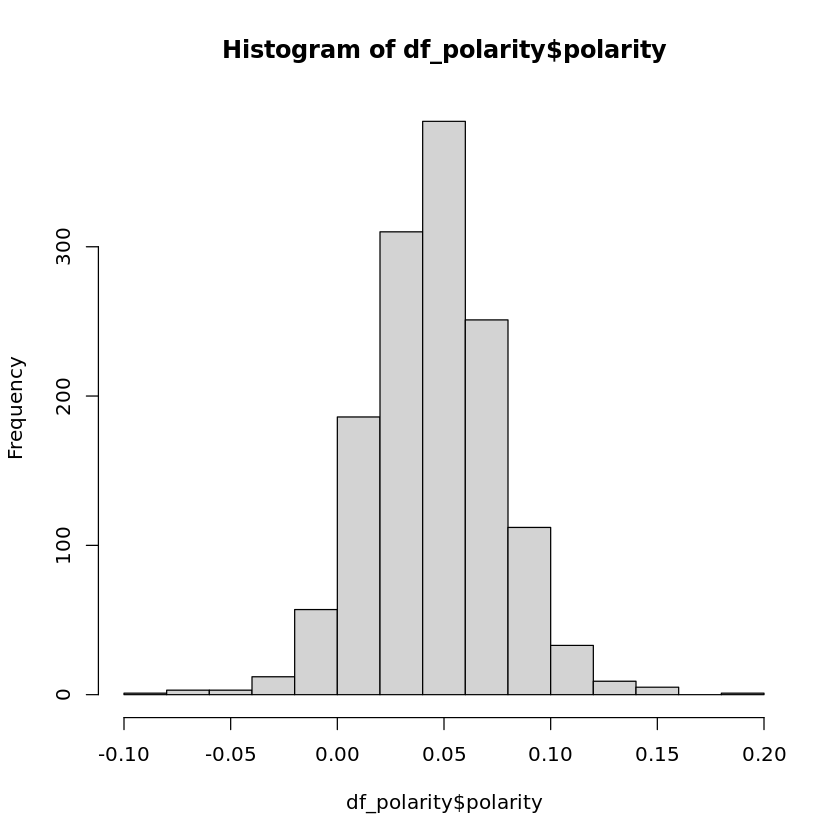

In [14]:
hist(df_polarity$polarity)

In [39]:
df_econ <- read.csv('../Data/UK_Daily_Policy_Data.csv')
df_econ <- df_econ %>% mutate(date = as.POSIXct(date, format="%d/%m/%Y",tz="GMT")) %>% select(date, daily_policy_index)

In [40]:
df_econ 

date,daily_policy_index
<dttm>,<dbl>
2001-01-01,50.70
2001-01-02,110.77
2001-01-03,179.41
2001-01-04,183.22
2001-01-05,89.31
2001-01-06,112.22
2001-01-07,114.25
2001-01-08,365.29
2001-01-09,260.13


In [41]:
df_full <- df_full %>% mutate(date = date(chunk))
head(df_full)

,chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity,standardised_texts,abnormal,date
,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<date>
1,2018-10-25 15:00:00,3,12.00763,61.19429,0.01692665,0.064640803028311,-1.4095363,0,2018-10-25
2,2018-10-25 16:00:00,3,11.57139,73.15986,0.02115831,0.064640803028311,-2.2057631,0,2018-10-25
3,2018-10-25 17:00:00,8,11.02727,79.58946,0.01100232,0.064640803028311,-1.4766641,0,2018-10-25
4,2018-10-25 18:00:00,9,10.61496,67.47871,0.01438765,0.064640803028311,-0.9937495,0,2018-10-25
5,2018-10-25 19:00:00,11,10.41435,73.72830,0.01608032,0.064640803028311,-0.9455626,0,2018-10-25
6,2018-10-25 20:00:00,24,10.39280,75.48596,0.01438765,0.064640803028311,0.7105955,0,2018-10-25


In [42]:
df_full <- left_join(df_full, df_econ, by = 'date')
df_full <- df_full %>% select(-date)
head(df_full)

,chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity,standardised_texts,abnormal,daily_policy_index
,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>
1,2018-10-25 15:00:00,3,12.00763,61.19429,0.01692665,0.064640803028311,-1.4095363,0,196.24
2,2018-10-25 16:00:00,3,11.57139,73.15986,0.02115831,0.064640803028311,-2.2057631,0,196.24
3,2018-10-25 17:00:00,8,11.02727,79.58946,0.01100232,0.064640803028311,-1.4766641,0,196.24
4,2018-10-25 18:00:00,9,10.61496,67.47871,0.01438765,0.064640803028311,-0.9937495,0,196.24
5,2018-10-25 19:00:00,11,10.41435,73.72830,0.01608032,0.064640803028311,-0.9455626,0,196.24
6,2018-10-25 20:00:00,24,10.39280,75.48596,0.01438765,0.064640803028311,0.7105955,0,196.24


In [43]:
saveRDS(df_full, '../Data/Full_data.rds')
write.csv(df_full, '../Data/Full_data.csv')

In [3]:
df_full


,chunk,texts,temp_weighted,cloud_cover_weighted,rainfall_weighted,polarity,standardised_texts,abnormal,daily_policy_index,1_hr_std,⋯,19_hr,20_hr,21_hr,22_hr,23_hr,24_hr,25_hr,26_hr,27_hr,28_hr
,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
29,2018-10-26 19:00:00,17,6.034263,21.525829,0.000000000,0.0432121742867696,0.41711591,0,131.03,-0.60106793,⋯,6,17,18,22,24,11,9,8,3,3
30,2018-10-26 20:00:00,15,5.561813,16.283735,0.000000000,0.0432121742867696,-0.40451992,0,131.03,0.41711591,⋯,7,6,17,18,22,24,11,9,8,3
31,2018-10-26 21:00:00,15,5.399833,17.538188,0.000000000,0.0432121742867696,-0.91450446,0,131.03,-0.40451992,⋯,5,7,6,17,18,22,24,11,9,8
32,2018-10-26 22:00:00,19,4.787232,10.768733,0.000000000,0.0432121742867696,-0.33752637,0,131.03,-0.91450446,⋯,1,5,7,6,17,18,22,24,11,9
33,2018-10-26 23:00:00,21,4.534415,11.672903,0.000000000,0.0432121742867696,1.04199641,0,131.03,-0.33752637,⋯,2,1,5,7,6,17,18,22,24,11
34,2018-10-27 00:00:00,5,4.079211,14.185104,0.000000000,0.0203183999705964,-0.89322604,0,112.53,1.04199641,⋯,0,2,1,5,7,6,17,18,22,24
35,2018-10-27 01:00:00,8,4.028406,24.473330,0.000000000,0.0203183999705964,0.63323779,0,112.53,-0.89322604,⋯,1,0,2,1,5,7,6,17,18,22
36,2018-10-27 02:00:00,3,3.646402,21.989287,0.000000000,0.0203183999705964,-0.35856858,0,112.53,0.63323779,⋯,3,1,0,2,1,5,7,6,17,18
37,2018-10-27 03:00:00,0,3.128456,14.128127,0.000000000,0.0203183999705964,-1.64805080,0,112.53,-0.35856858,⋯,1,3,1,0,2,1,5,7,6,17


In [4]:
sum(df_full$texts)

[1] 1352167

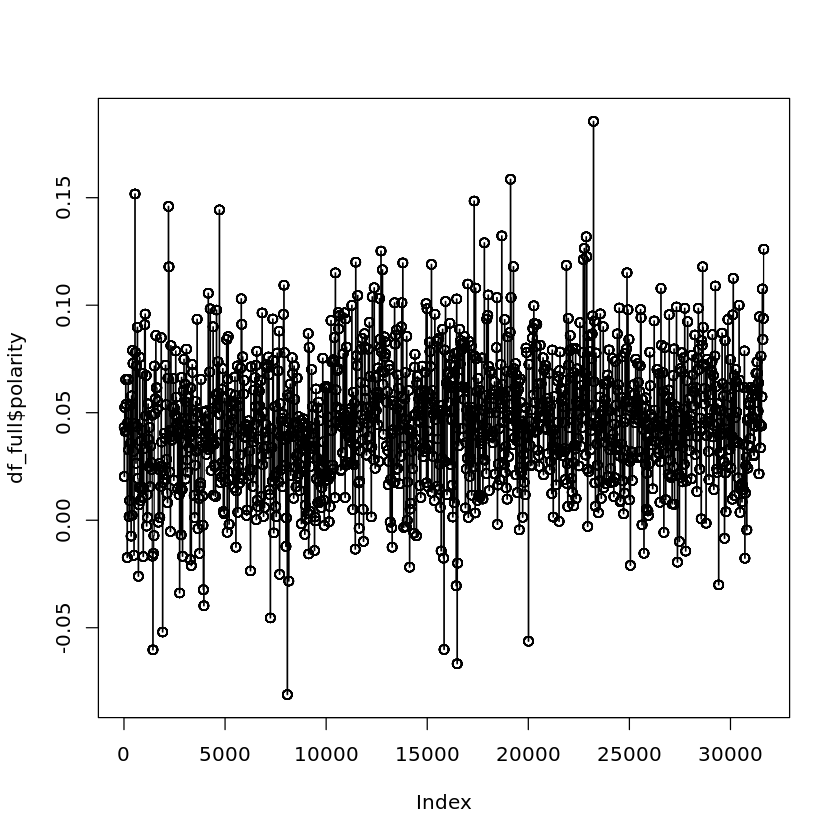

In [8]:
plot(df_full$polarity)
lines(df_full$polarity)